/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:214: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


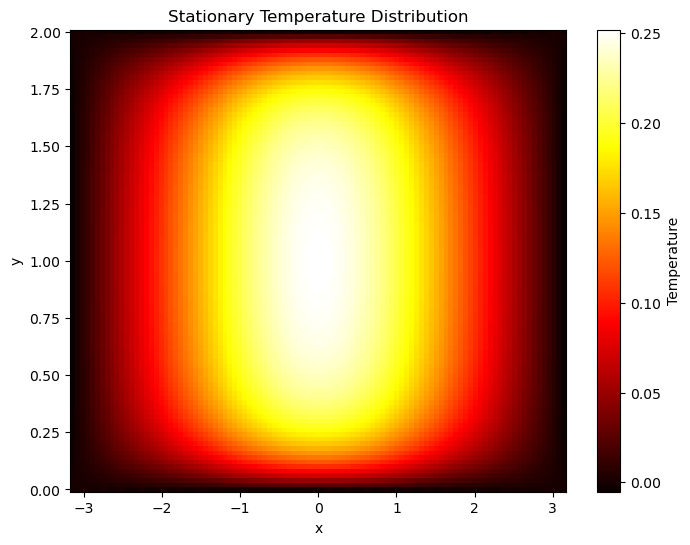

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

# Parameters
height = 2
radius = 1
n = 100  # Number of divisions in x
m = 100  # Number of divisions in y
hx = 2 * np.pi / n
hy = height / m

# Discretization
x = np.linspace(-np.pi, np.pi, n+1)
y = np.linspace(0, height, m+1)
X, Y = np.meshgrid(x, y)

# A and f
A = diags([1/hy**2, 1/hx**2, -2/hy**2 - 2/hx**2, 1/hx**2, 1/hy**2], [-m-1, -1, 0, 1, m+1], shape=((m+1)*(n+1), (m+1)*(n+1))).toarray()
b = np.zeros((m+1) * (n+1))

# Applying the source term -cos(x) for the given range
for i in range(1, n):  # Skip the first and last points (boundary)
    for j in range(1, m+1):  # Apply only to interior points in y
        if -np.pi/2 <= x[i] <= np.pi/2:
            b[j + i * (m+1)] = -np.cos(x[i])

# Applying Dirichlet boundary conditions
for i in range(n+1):
    # Bottom boundary (on the ice)
    A[i*(m+1), i*(m+1)] = 1
    b[i*(m+1)] = -1  # Assuming the temperature of the ice is 0
    
    # Top boundary (insulated)
    A[(i+1)*(m+1)-1, (i+1)*(m+1)-1] = 1
    b[(i+1)*(m+1)-1] = -1  # Insulated top implies no heat change

# Left and right boundary (insulated)
for j in range(1, m):
    A[j, j] = 1  # Left boundary
    b[j] = 0  # Neumann boundary condition implies derivative is zero
    A[j + n*(m+1), j + n*(m+1)] = 1  # Right boundary
    b[j + n*(m+1)] = 0  # Neumann boundary condition implies derivative is zero

# Solve the system
u = spsolve(A, b)

# Reshape the solution to the grid
u = u.reshape((n+1, m+1))

# Plot the solution
plt.figure(figsize=(8, 6))
plt.pcolormesh(X, Y, u.T, shading='auto', cmap='hot')
plt.colorbar(label='Temperature')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Stationary Temperature Distribution')
plt.show()


/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:214: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


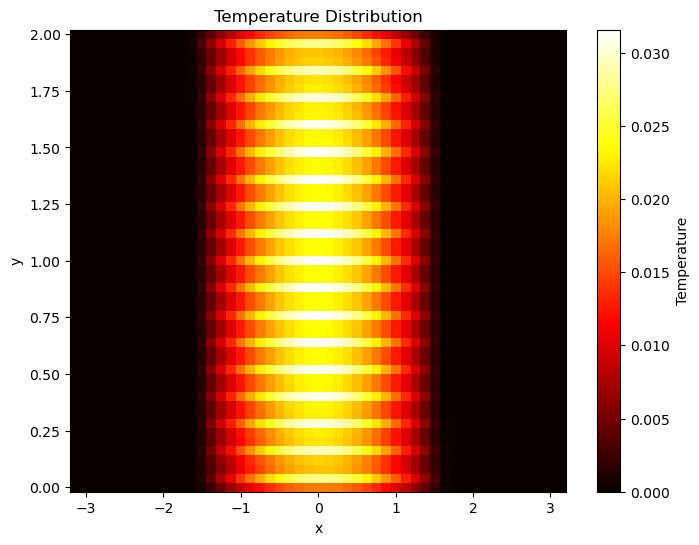

In [5]:
import numpy as np
from scipy.sparse import bmat

def A_matrix(num_blocks):
    # Define submatrices A, B, and C
    A = np.array([[-4, 1, 0], [1,-4,1], [0, 1, -4]]) 
    B = np.array([[2,0,0],[0,2,0],[0,0,2]]) 
    C = np.array([[1,0,0],[0,1,0],[0,0,1]])


    # Create an empty list to hold the block rows
    block_rows = []

    # Populate the block matrix structure with submatrices A, B, and C
    for i in range(num_blocks):
        block_row = [None] * num_blocks
        block_row[i] = A
        
        if i > 0:  # Subdiagonal blocks
            block_row[i - 1] = C
        
        if i < num_blocks - 1:  # Superdiagonal blocks
            block_row[i + 1] = C

        block_rows.append(block_row)

    # Replace the first superdiagonal block with B
    block_rows[0][1] = B

    # Replace the second to last subdiagonal block with B
    block_rows[num_blocks-1][num_blocks-2] = B

    # Convert the block matrix structure to a scipy.sparse matrix
    block_matrix = bmat(block_rows, format='csr')

    # Convert to a dense matrix for printing or further operations
    dense_matrix = block_matrix.toarray()
    return dense_matrix

# Given parameters
height = 2
radius = 1
n = 50  # Number of divisions in x
m = 50  # Number of divisions in y
hx = 2 * np.pi / n
hy = height / m

# Create mesh grid for plotting
x = np.linspace(-np.pi, np.pi, n + 1)
y = np.linspace(0, height, m + 1)
X, Y = np.meshgrid(x, y)

N = (n + 1) * (m + 1)  # Total number of points
num_blocks = N // 3  # Number of block matrices
A = A_matrix(num_blocks)
f = np.zeros(A.shape[0])

for i in range(n + 1):
    for j in range(m + 1):
        idx = i * (m + 1) + j
        if 0 < j < m and -0.5 * np.pi <= x[i] <= 0.5 * np.pi:
            f[idx] = -np.cos(x[i]) * hx**2

# Solve Au = f
u = spsolve(A, f)

# Reshape u for plotting
u = u.reshape((n + 1, m + 1))

# Plotting
plt.figure(figsize=(8, 6))
plt.pcolormesh(X, Y, u.T, shading='auto', cmap='hot')
plt.colorbar(label='Temperature')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Temperature Distribution')
plt.show()

ValueError: could not broadcast input array from shape (10,3) into shape (4,4)